In [1]:
import numpy as np
from qiskit import *
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
%matplotlib inline

This circuit finds the minimum eigenvalue of a $2 \times 2$ matrix, $\mathbf{A}$.

To do so, we find the expectation value of $\mathbf{A}$ given by
$$
\langle \mathbf{A} \rangle = \frac{a_{11} + a_{22}}{2} + a_{12}\langle \mathbf{X} \rangle + \frac{a_{11} - a_{22}}{2}\langle \mathbf{Z} \rangle 
$$

for the wave functions

$$
| \psi(\theta) \rangle = \cos\theta |0\rangle + \sin\theta |1\rangle
$$

and find the minimum expectation value

In [2]:
def statePrepCirc(theta):
    statePrepCirc = QuantumCircuit(1, 1)
    statePrepCirc.ry(2*theta, 0)
    return statePrepCirc

def expectationValue(A, theta, shots=1024):
    if len(A) != 2 and len(A[0]) != 2:
        raise Exception("This function only supports 2 x 2 matrices")
    backend = Aer.get_backend('qasm_simulator')
    xCirc = statePrepCirc(theta)
    zCirc = xCirc.copy()
    
    # Create X circuit
    xCirc.h(0)
    xCirc.measure(0, 0)
    
    # Create Z circuit
    zCirc.measure(0, 0)
    
    xJob = execute(xCirc, backend, shots=shots)
    xRes = xJob.result()
    xCounts = xRes.get_counts(xCirc)
    # To prevent KeyErrors
    if '0' not in xCounts:
        xCounts['0'] = 0 
    if '1' not in xCounts:
        xCounts['1'] = 0 
    xExp = xCounts['0']/shots - xCounts['1']/shots # TODO Check this is correct 
    
    zJob = execute(zCirc, backend, shots=shots)
    zRes = zJob.result()
    zCounts = zRes.get_counts(zCirc)
    # To prevent KeyErrors
    if '0' not in zCounts:
        zCounts['0'] = 0 
    if '1' not in zCounts:
        zCounts['1'] = 0 
    zExp = zCounts['0']/shots - zCounts['1']/shots
    
    return (A[0][0] + A[1][1])/2 + A[0][1]*xExp + (A[0][0] - A[1][1])/2 * zExp
    
    

In [3]:
A = np.array([[2, 2], [2, -1]])

In [4]:
# Verification
print("Minimum eigenvalue: {}".format(min(np.linalg.eig(A)[0])))

Minimum eigenvalue: -2.0


In [5]:
thetas = np.linspace(0, 2*np.pi, 100)
shots = 2048
print("Estimated error tolerance: {}".format(1/np.sqrt(shots)))

Estimated error tolerance: 0.022097086912079608


In [6]:
expFunc = lambda theta: expectationValue(A, theta, shots=shots)
expectations = np.vectorize(expFunc)(thetas)

In [7]:
print("Predicted minimum eigenvalue: {}".format(min(expectations)))

Predicted minimum eigenvalue: -2.064453125


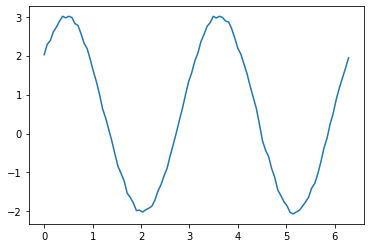

In [8]:
plt.plot(thetas, expectations)